In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Exercise 1. MNIST Tweak

## Load the Dataset

In [2]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml("mnist_784",version=1, as_frame=False)

In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

## Training and testing

In [4]:
###training and testing data
X=mnist["data"]
y=mnist["target"]
X_train, X_test, y_train, y_test=X[:60000], X[60000:], y[:60000], y[60000:]

### K-Neighbours algorithm - goal 97%

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9676 , 0.9671 , 0.96755])

In [9]:
from sklearn.model_selection import cross_val_predict

y_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)

In [11]:
from sklearn.metrics import confusion_matrix

conf_mat=confusion_matrix(y_train, y_pred)

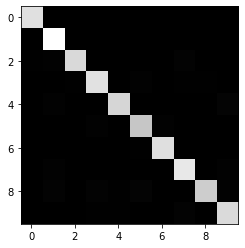

In [15]:
plt.imshow(conf_mat, cmap=plt.cm.gray)

## tweaking the hyperparameters:
(i did it only with unifrom, but it was default, should have done with "distance" weights

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid=[{
"weights":["uniform"], "n_neighbors":[2,3,4]}
]

In [18]:
grid_search=GridSearchCV(knn_clf, param_grid,cv=3, scoring="neg_mean_squared_error",return_train_score=True)


In [20]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [2, 3, 4], 'weights': ['uniform']}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [22]:
grid_search.best_params_

{'n_neighbors': 3, 'weights': 'uniform'}

## Updating the model withbetter parameters

In [27]:

knn_clf = KNeighborsClassifier(weights="distance", n_neighbors=4)
knn_clf.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=4, weights='distance')

In [28]:

cross_val_score(knn_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.9709 , 0.9698 , 0.97035])

In [33]:
pred=knn_clf.predict(X[:100])

In [34]:
pred==y_train[:100]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])